In [16]:
library(ggplot2)
library(coda)

# Introduction

Marks are indicated in square brackets. Please enter your answers either in Markdown format (using Latex for maths expressions) in the "YOUR ANSWER HERE" cells (you need to double-click to active the cell) or using R code in the `# YOUR CODE HERE` cells (just click and type). Do not use code cells for text and maths or Markdown cells for code. 

The data file `mydata.txt` is available in the same directory as this notebook file, and can therefore be read in using only the filename. 

# The Problem

We wish to analyse some data that records the heights $h = \{h_{i}\}_{i\in[1..n]}$ of $n = 200$ plants of a particular species. 

# Question 1

Read in the data from file 'mydata.txt' and extract the heights vector. [2]

## Answer

In [17]:
# YOUR CODE HERE
data <- read.table('mydata.txt')
h <- as.numeric(unlist(data))

The following command should show the first six elements of the data.

In [18]:
head(h)

[1] 123.34495 113.03420 107.74031  93.50552 105.75332 103.16530

We are interested in the underlying mean height of the plants, $\mu$ and the variance of their heights $1/\tau$. We assume that our knowedge of the heights is captured by a Normal distribution with mean $\mu$ and inverse variance ('precision') $\tau$, and that the heights of plants are independent once we know the values of these parameters. (We assume that $\mu$ is large enough compared to $1/\sqrt{\tau}$ that the probability of negative heights is negligibly small.)

The probability of the data given the parameters $\mu$ and $\tau$ therefore takes the form (where as usual $K$ stands for unspecified other knowledge):
$$
P(h \mid \mu, \tau, K) = \prod_{i = 1}^{n} dh_{i} \: P(h_{i} \mid \mu, \tau, K)
$$

where each $P(h_{i} \mid \mu, \tau, K)$ is Normal. 

# Question 2

Show that 
$$
P(h \mid \mu, \tau, K) 
= dh\: \left({\tau \over 2\pi}\right)^{n/2} \exp\left(-{n\tau \over 2}[(\mu - \bar{h})^{2} + s^{2}]\right)
$$

where $dh = \prod_{i} dh_{i}$; $\bar{h} = {1\over n}\sum_{i=1}^{n} h_{i}$; and $s^{2} = \left({1 \over n} \sum_{i = 1}^{n} h_{i}^{2}\right) - \bar{h}^{2}$. [8]


## Answer

\begin{align*}
P(h \mid \mu, \tau, K) & = \prod_{i = 1}^{n} dh_{i} \: P(h_{i} \mid \mu, \tau, K)\\
&= \prod_{i = 1}^{n} dh_{i} \: \frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{-(h_{i}-\mu)^2}{2\sigma^2}}\\
&= \prod_{i = 1}^{n} dh_{i} \: \prod_{i = 1}^{n} \frac{1}{\sqrt{2\pi \sigma^2}} \prod_{i = 1}^{n} e^{\frac{-(h_{i}-\mu)^2}{2\sigma^2}}\\
&= dh \: \prod_{i = 1}^{n} \frac{\sqrt{\tau}}{\sqrt{2\pi }} \prod_{i = 1}^{n} e^{\frac{-(h_{i}-\mu)^2}{2\sigma^2}}\\
&= dh \:  (\frac{\tau}{2\pi })^{(\frac{n}{2})} \prod_{i = 1}^{n} e^{\frac{-(h_{i}-\mu)^2}{2\sigma^2}}\\
&= dh \:  (\frac{\tau}{2\pi })^{(\frac{n}{2})}  \:\exp(\Sigma_{i = 1}^{n} \frac{-(h_{i}-\mu)^2}{2\sigma^2})\\
&= dh \:  (\frac{\tau}{2\pi })^{(\frac{n}{2})}  \:\exp(\Sigma_{i = 1}^{n} \frac{-h_{i}^2 +2h_{i}\mu - \mu^2}{2\sigma^2})\\
&= dh \:  (\frac{\tau}{2\pi })^{(\frac{n}{2})}  \:\exp(\frac{-n \tau}{2}(\frac{1}{n}\Sigma_{i = 1}^{n} h_{i}^2 - 2\frac{1}{n}\Sigma_{i = 1}^{n} h_{i} \mu + \frac{1}{n}\Sigma_{i = 1}^{n} \mu ^2))\\
&= dh \:  (\frac{\tau}{2\pi })^{(\frac{n}{2})}  \:\exp(\frac{-n \tau}{2}( - 2 \overline{h_{i}} \mu + \frac{1}{n} n\mu ^2 +\frac{1}{n}\Sigma_{i = 1}^{n} h_{i}^2))\\
&= dh \:  (\frac{\tau}{2\pi })^{(\frac{n}{2})}  \:\exp(\frac{-n \tau}{2}(\mu^2 - 2 \overline{h_{i}} \mu + \overline{h}^2 - \overline{h}^2 +\frac{1}{n}\Sigma_{i = 1}^{n} h_{i}^2))\\
&= dh \:  (\frac{\tau}{2\pi })^{(\frac{n}{2})}  \:\exp(\frac{-n \tau}{2}( (\mu - \overline{h})^2  +\frac{1}{n}\Sigma_{i = 1}^{n} h_{i}^2 - \overline{h}^2))\\
&= dh \:  (\frac{\tau}{2\pi })^{(\frac{n}{2})}  \:\exp(\frac{-n \tau}{2}( (\mu - \overline{h})^2  + s^2))\\
\end{align*}

# Question 3

Show that the maximum likelihood estimates $\hat{\mu}$ and $\hat{\tau}$ of $\mu$ and $\tau$ are $\bar{h}$ and $1/s^{2}$ respectively. [4]

## Answer

\begin{align*}
P(h \mid \mu, \tau, K) &= dh \:  (\frac{\tau}{2\pi })^{(\frac{n}{2})}  e^{\frac{-n \tau}{2}( (\mu - \overline{h})^2  + s^2)}\\
 &= \log{(dh)} \: +  \log{( (\frac{\tau}{2\pi })^{(\frac{n}{2})})} + log{(e^{\frac{-n \tau}{2}( (\mu - \overline{h})^2  + s^2)})}\\
  &= \log{(dh)} \: +  \log{( (\frac{\tau}{2\pi })^{(\frac{n}{2})})} + \frac{-n \tau}{2}( (\mu - \overline{h})^2  + s^2)\\
  \frac{\partial p}{\partial \mu} &= (-n \tau)( (\mu - \overline{h})\\
      (By\hspace{1mm} setting\hspace{1mm} value\hspace{1mm} to\hspace{1mm} zero\hspace{1mm} we\hspace{1mm} get):&\\
\frac{\partial p}{\partial \mu} &= \hat{\mu} = \overline{h}\\
    \frac{\partial p}{\partial \tau} &= \frac{n}{2}(\frac{1}{2\pi} \frac{1}{\frac{\tau}{2\pi}}) - \frac{n}{2} ((\mu - \overline{h})^2 + s^2)\\
    (By\hspace{1mm} setting\hspace{1mm} value\hspace{1mm} to\hspace{1mm} zero\hspace{1mm} we\hspace{1mm} get):&\\
        \frac{\partial p}{\partial \tau} &=  \frac{1}{\tau} =  ((\mu - \overline{h})^2 + s^2)\\
    (\mu = \overline{h}) &\\
            \frac{\partial p}{\partial \tau} &=  \hat{\tau} =  \frac{1}{s^2}\\     
(Check!) &\\
  \frac{\partial^2 p}{\partial \mu^2} &= (-n \tau) \hspace{1mm}(Always \hspace{1mm} less \hspace{1mm} than \hspace{1mm} zero)\\
  \frac{\partial^2 p}{\partial \tau^2} &= \frac{-n}{2 \tau ^2} \hspace{1mm}(Always \hspace{1mm} less \hspace{1mm} than \hspace{1mm} zero)\\
\end{align*}

# Question 4

Plot a histogram of the data and compute these MLEs [5]

## Answer

[1] "The maximum likelihood estimate of h is:  100.512831687187"
[1] "The maximum likelihood estimate of tau is:  0.00915973323320005"


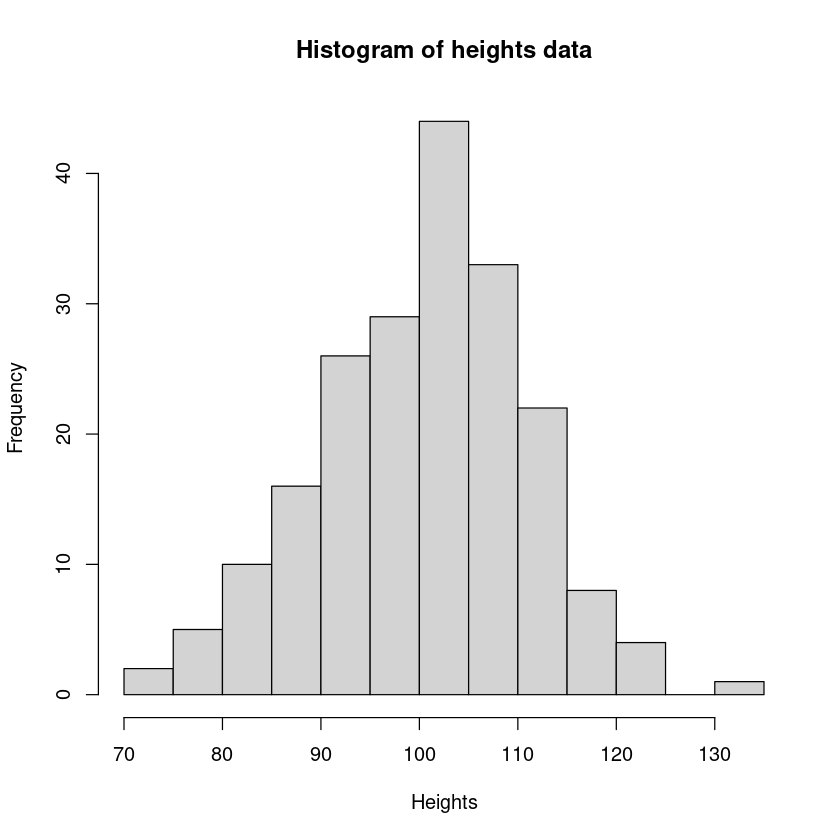

In [19]:
# YOUR CODE HERE

hist(h, main = "Histogram of heights data", xlab = "Heights")


hd = mean (h)
print(paste("The maximum likelihood estimate of h is: ",hd))
s = mean (h**2) - hd**2
tau  =1/s
print(paste("The maximum likelihood estimate of tau is: ",tau))



We are interested in knowing about $\mu$ and $\tau$. We therefore wish to calculate the probability $P(\mu, \tau \mid h, K)$. By Bayes theorem, we have
$$
P(\mu, \tau \mid h, K) \propto P(h \mid \mu, \tau, K) P(\mu, \tau \mid K)
$$

We will use the Normal-Gamma distribution as our distribution for $\mu$ and $\tau$ given $K$, which is given by:
$$
P(\mu, \tau \mid m, \nu, a, b, K) = d\mu\:d\tau\: {b^{a} \over \Gamma(a)}\: \tau^{a - 1}\: e^{-b\tau}\:\sqrt{\nu\tau \over 2\pi}\:\exp\left(-{\nu\tau \over 2}(\mu - m)^{2}\right)
$$

# Question 5

Show that $P(\mu, \tau | h, m, \nu, a, b, K) \propto P(h \mid \mu, \tau, K)\: P(\mu, \tau \mid m, \nu, a, b, K)$ is also a Normal-Gamma distribution, with parameters (shown with primes): [8]
\begin{align*}
m' & = {\nu m + n \bar{h} \over (\nu + n)} \\
\nu' & = \nu + n \\
a' & = a + {n \over 2} \\
b' & = b + {n \over 2} \left(s^{2} + {\nu \over (\nu + n)} (\bar{h} - m)^{2}\right)
\end{align*}


## Answer 

\begin{align*}
   P(\mu, \tau|h,K) & \propto P(h|\mu, \tau, K) P(\mu, \tau|m, v, a, b, K)\\
   &\propto dhd\mu d\tau (\frac{\tau}{2\pi})^{\frac{n}{2}} \frac{b^a}{\Gamma(a)} \tau^{a-1} \sqrt{\frac{v\tau}{2\pi}} \:\exp (-b\tau -\frac{-n\tau}{2}((\mu-\overline{h})^2+s^2) -\frac{v\tau}{2}(\mu-m)^2)\\
   & \propto dhd\mu d\tau (\frac{\tau}{2\pi})^{\frac{n}{2}} \frac{b^a}{\Gamma(a)} \tau^{a-1} \sqrt{\frac{v\tau}{2\pi}} \:\exp(-b\tau -\frac{-n\tau}{2}(\mu^2-2\mu \overline{h}+\overline{h}^2+s^2)-\frac{v\tau}{2}(\mu^2-2m\mu+m^2))\\
   & \propto dhd\mu d\tau (\frac{\tau}{2\pi})^{\frac{n}{2}} \frac{b^a}{\Gamma(a)} \tau^{a-1} \sqrt{\frac{v\tau}{2\pi}} \:\exp(-b\tau - \frac{n\tau}{2}\mu^2 - n\tau \frac{s^2}{2} + n\tau \mu\overline{h}- \frac{n \tau \overline{h}^2}{2}- \frac{v \tau \mu^2}{2}+v\tau m \mu - \frac{v \tau m^2}{2})\\
   & \propto dhd\mu d\tau (\frac{\tau}{2\pi})^{\frac{n}{2}} \frac{b^a}{\Gamma(a)} \tau^{a-1} \sqrt{\frac{v\tau}{2\pi}} \:\exp(-\tau(b+ n\frac{s^2}{2}+n\frac{\mu^2}{2}-n\mu \overline{h}+ n\frac{\overline{h}^2}{2}+v\frac{\mu^2}{2}-v m \mu + v\frac{m^2}{2}))\\
   & \propto dhd\mu d\tau (\frac{\tau}{2\pi})^{\frac{n}{2}} \frac{b^a}{\Gamma(a)} \tau^{a-1} \sqrt{\frac{v\tau}{2\pi}} \:\exp(-\tau(b+n\frac{s^2}{2}+ n\frac{\overline{h}^2}{2}+v\frac{m^2}{2}+\frac{(n+v)}{2}\mu^2 - (n \overline{h}+vm)\mu + \frac{1}{2} \frac{(vm+n\overline{h})^2}{(v+n)} - \frac{1}{2} \frac{(vm+n\overline{h})^2}{(v+n)}))\\
   & \propto dhd\mu d\tau (\frac{\tau}{2\pi})^{\frac{n}{2}} \frac{b^a}{\Gamma(a)} \tau^{a-1} \sqrt{\frac{v\tau}{2\pi}} \:\exp(-\tau(b+n\frac{s^2}{2}+ n\frac{\overline{h}^2}{2}+v\frac{m^2}{2}+\frac{(n+v)}{2}(\mu^2- \frac{2(n\overline{h}+vm)}{(n+v)}\mu + (\frac{(n\overline{h}+vm)}{(n+v)})^2) - \frac{1}{2}\frac{(n\overline{h}+vm)^2}{(n+v)} ))\\
   & \propto dhd\mu d\tau (\frac{\tau}{2\pi})^{\frac{n}{2}} \frac{b^a}{\Gamma(a)} \tau^{a-1} \sqrt{\frac{v\tau}{2\pi}} \:\exp(-\tau(b+n\frac{s^2}{2}+ n\frac{\overline{h}^2}{2}+v\frac{m^2}{2}-\frac{1}{2(n+v)}(v^2 m^2 + 2vnm\overline{h}+n^2\overline{h}^2)+ \frac{n+v}{2}(\mu - m')^2 ))\\
   & \propto dhd\mu d\tau (\frac{\tau}{2\pi})^{\frac{n}{2}} \frac{b^a}{\Gamma(a)} \tau^{a-1} \sqrt{\frac{v\tau}{2\pi}} \:\exp(-\tau(b+n\frac{s^2}{2}+ n\frac{\overline{h}^2}{2} \frac{v+n}{v+n}+v\frac{m^2}{2} \frac{v+n}{v+n} -\frac{1}{2(n+v)}(v^2 m^2 + 2vnm\overline{h}+n^2\overline{h}^2)+ \frac{n+v}{2}(\mu - m')^2 ))\\
   & \propto dhd\mu d\tau (\frac{\tau}{2\pi})^{\frac{n}{2}} \frac{b^a}{\Gamma(a)} \tau^{a-1} \sqrt{\frac{v\tau}{2\pi}} \:\exp(-\tau( b + \frac{n}{2} s^2 + \frac{n+v}{2}(\mu -m')^2 + (\frac{nv\overline{h}^2+ n^2 \overline{h}^2 +v^2 m^2 + v n m^2 - v^2 m^2 -2vnm\overline{h} - n^2 \overline{h}^2 }{2(v+n)}) ))\\
   & \propto dhd\mu d\tau (\frac{\tau}{2\pi})^{\frac{n}{2}} \frac{b^a}{\Gamma(a)} \tau^{a-1} \sqrt{\frac{v\tau}{2\pi}} \:\exp(-\tau( b + \frac{n}{2} s^2 + \frac{(n+v)}{2}(\mu -m')^2 + \frac{nv}{2(v+n)}(\overline{h}^2 - 2m \overline{h} +m^2)  ))\\
   & \propto dhd\mu d\tau (\frac{\tau}{2\pi})^{\frac{n}{2}} \frac{b^a}{\Gamma(a)} \tau^{a-1} \sqrt{\frac{v\tau}{2\pi}} \:\exp(-\tau( b + \frac{n}{2}( s^2 + \frac{v}{(v+n)}(\overline{h}-m)^2) + \frac{(n+v)}{2}(\mu -m')^2  ))\\
   & \propto dhd\mu d\tau (\frac{\tau}{2\pi})^{\frac{n}{2}} \frac{b^a}{\Gamma(a)} \tau^{a-1} \sqrt{\frac{v\tau}{2\pi}} e^{-\tau b'} \:\exp((\frac{-\tau v'}{2}(\mu -m')^2  ))\\
  & \propto dhd\mu d\tau (\frac{1}{2\pi})^{\frac{n}{2}} \frac{b^a}{\Gamma(a)}\sqrt{\frac{v}{2\pi}} \tau^{a+\frac{n}{2}-\frac{1}{2}} e^{-\tau b'} \:\exp((\frac{-\tau v'}{2}(\mu -m')^2  ))\\
& \propto dhd\mu d\tau (\frac{1}{2\pi})^{\frac{n}{2}} \frac{b^a}{\Gamma(a)}\sqrt{\frac{v}{2\pi}} \tau^{a' -\frac{1}{2}} e^{-\tau b'} \:\exp((\frac{-\tau v'}{2}(\mu -m')^2  ))\\
& (It \hspace{1mm}  is\hspace{1mm}  a\hspace{1mm} proportional\hspace{1mm}  relation. We\hspace{1mm} can\hspace{1mm} get\hspace{1mm} rid\hspace{1mm} of\hspace{1mm} constants.)\\
& \propto \tau^{a' -\frac{1}{2}} e^{-\tau b'} \:\exp((\frac{-\tau v'}{2}(\mu -m')^2  ))\\ 
& \propto NormalGamma(m', v', a', b')\\
\end{align*}

# Question 6

What is this behaviour called? [1]

## Answer

Conjugate prior.

Now suppose that prior knowledge tells us that $\nu = 0$, $a = 0$, and $b = 0$. 


# Question 7

Write down and give the family name for:

1. the distribution $P(\mu, \tau | h, m, \nu = 0, a = 0, b = 0, K)$; [1]
2. the conditional distribution $P(\mu | \tau, h, m, \nu = 0, a = 0, b = 0, K)$; [2]
3. the conditional distribution $P(\tau | \mu, h, m, \nu = 0, a = 0, b = 0, K)$; [2]
3. the marginalized distribution $P(\tau | h, m, \nu = 0, a = 0, b = 0, K)$. [4]


## Answer 

Noraml Gamma distribution.

Normal distribution.

Gamma distribution.

Gamma distribution.

# Question 8

Write an R function to evaluate the logarithm of the density, with respect to $d\mu\: d\tau$, of $P(\mu, \tau \mid h, K)$, up to an additive constant. Note that the conditions $\nu = 0, a = 0, b = 0$ have been absorbed into $K$, $m$ has been dropped because, given these conditions, the probability does not depend on $m$. The function should have as inputs $\mu$, $\tau$, and the data (in this case `heights`), and should calculate $n$, $\bar{h}$, and $s$ as part of its execution. [5]

## Answer 

In [20]:
# YOUR CODE HERE
post = function(mu,tau,data){

    n = length(data)
    hd = mean(data)
    ss = mean(data**2) - hd**2
    den = log((tau**((n/2)-1))*sqrt((n*tau)/(2*pi))*exp(-(n/2)*ss*tau)*exp((-n*tau/2)*(mu-hd)**2))   
    return(den)
}


# Question 9

Compute the value of the logarithm of the density (with respect to $d\mu\: d\tau$) of $P(\mu, \tau \mid h, K)$ on a rectangular grid of $(\mu, \tau)$ values with ranges $[98, 103]$ and $[0.005, 0.015]$ for $\mu$ and $\tau$ respectively. [2]

## Answer

In [21]:
# YOUR CODE HERE\
m = 10
dp = 5 / m
t = 1000
dt = 1/t
mus = seq(98, 103, by = dp)
taus = seq(0.005, 0.015, by = dt)
postt  <- matrix(0, nrow=11, ncol=11)

for (i in 1:11) {
    for (j in 1:11)
        {
        postt[i,j]  = post(mus[i],taus[j],h)
    }
}


#### Question

Make contour and image / heatmap plots of these values and of the corresponding probabilities (up to a multiplicative constant). [4]

## Answer

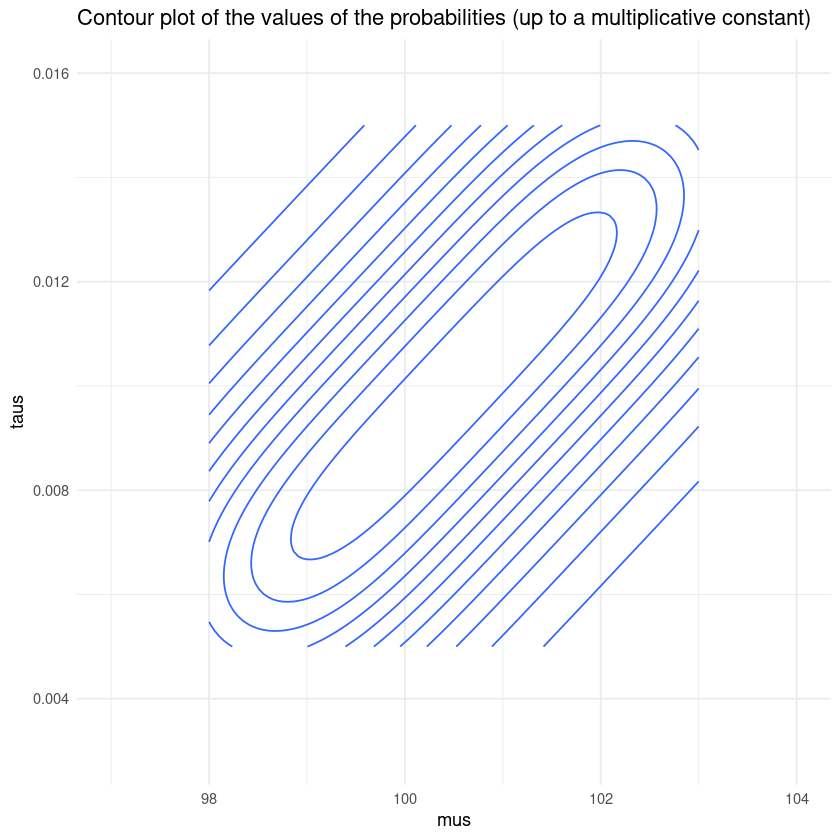

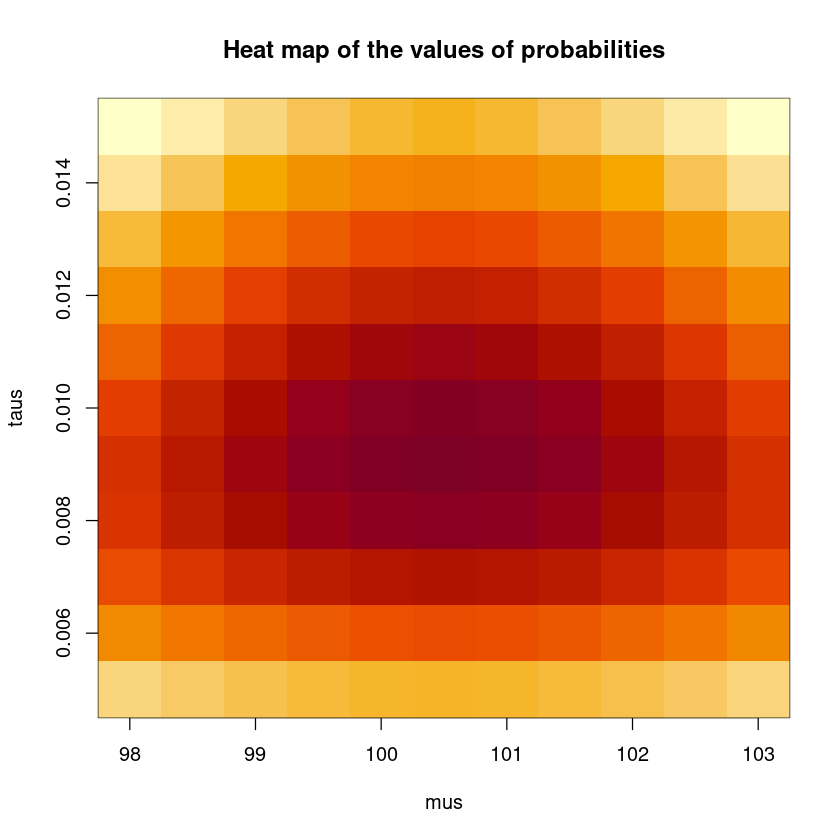

In [22]:
# YOUR CODE HERE
df <- data.frame(postt)
ggplot(df, aes(x = mus, y = taus)) +
  geom_density_2d()+
    theme_minimal()+
    coord_cartesian(xlim = c(97, 104),ylim = c(0.003, 0.016))+
    ggtitle("Contour plot of the values of the probabilities (up to a multiplicative constant)")
# Create a heatmap
image(mus,taus,postt,col = hcl.colors(256, "YlOrRd", rev = TRUE), main= "Heat map of the values of probabilities")


# Question 10

Use the grid probabilities to compute (approximations to) the expectations and standard deviations of $\mu$ and $\tau$ under $P(\mu, \tau \mid h, K)$. Hint: remember to normalize! [4]

## Answer 

In [23]:
# YOUR CODE HERE
a = exp(postt)
a = dp*dt*a
posttn = a/sum(a)
m = mean(posttn)
v = sd(posttn)
print(m)
print(v)

[1] 0.008264463
[1] 0.02053936


# Question 11

Could you have used smaller ranges for $\mu$ and $\tau$? Make sure to justify your answer. [1]

## Answer

Yes, but this would be useless for these reasons:
* We will get far way from MLEs region which, probably, has the largest region of probability density function.
* The logarithm of the density function is a constant plus a χ2d distribution divided by −2. So, the 0.05 contour line thus includes approximately 95% of the probability mass. [Ref Bayesian Data Analysis notebook ch 4]
* Log is a strictly decreasing function so we will get -inf results suddenly. 

# Question 12

Write R functions to perform *Gibbs sampling* to generate samples of $\mu$ and $\tau$. [10]

## Answer 

In [24]:
# YOUR CODE HERE
gibbsmu = function(oldtau, params) {
  
    m = params$m
    nu = params$nu
    
    newmu = rnorm(1, m, sqrt(1/(nu*oldtau)))

    return(newmu)
}


gibbstau = function(oldmu, params) {
    
    alpha = params$alpha
    b = params$b
    
    a = alpha + 1/2
  
    newtau = rgamma(1, a, b)

    return(newtau)
  
}


gibbsNormGamma = function(initmu, inittau, N, params){
    
  
  mus <- vector(length = N)
  taus <- vector(length = N)
  
  # Set initial values
  mus[1] = initmu
  taus[1] = inittau
  
  # Gibbs sampling
  for (i in 2:N) {
    
      newtau = gibbstau(mus[i - 1], params)
    
      taus[i] = newtau

      newmu = gibbsmu(taus[i], params)
    
      mus[i] = newmu
    
  }
  

    samples = rbind(mus, taus)

    return(samples)
  
}

# Question 13

What would make a good starting point for Gibbs sampling and why? [2]

## Answer 

YOUR ANSWER HERE
* Starting with initial values that are likely close to actual values is a good idea.
* Because the MLEs in our situation are estimated, it would be wise to begin with those values or ones that are somewhat close to them.
* In this case, we make our best to converge the stationary distribution in a short time and avoid getting biased samples.

Also, It worths mentioning that:
* In other cases, when we have a good prior knwoldge, we depend on the parameters of the prior distribution.
* In addation, In case we don't have good for both likliehood and prior, we depend on random values and generating these multiple times.
* Lastly, in other cases, we may depend on a hypred method which combines more than one of the methods listed above. 

# Question 14

Generate 5,000 samples of $(\mu, \tau)$ and plot traces of the samples and of their autocorrelation. [8]

## Answer 

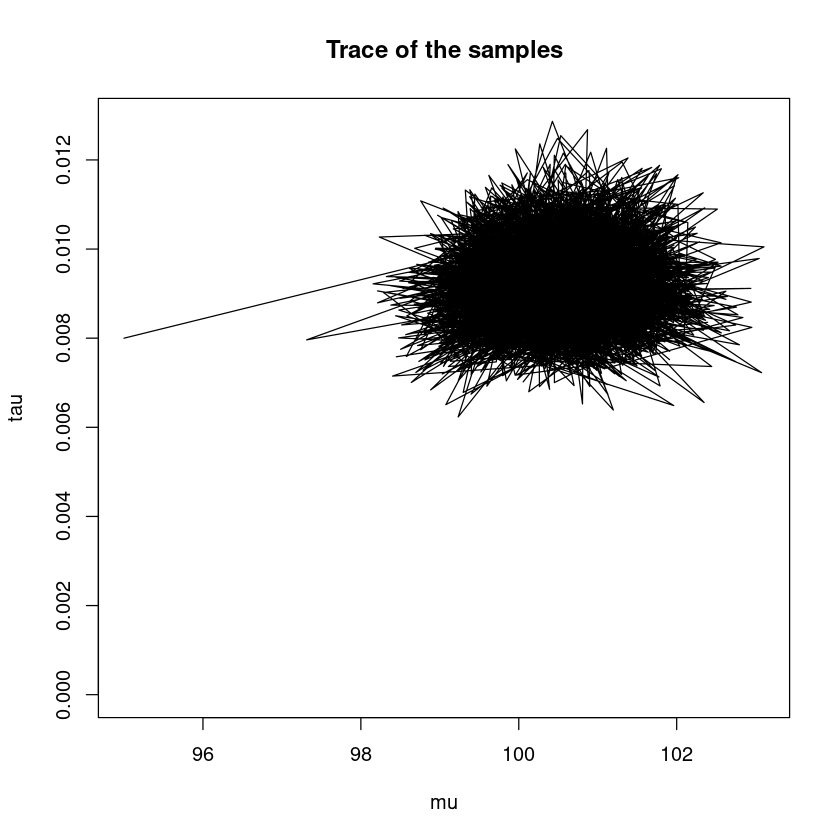

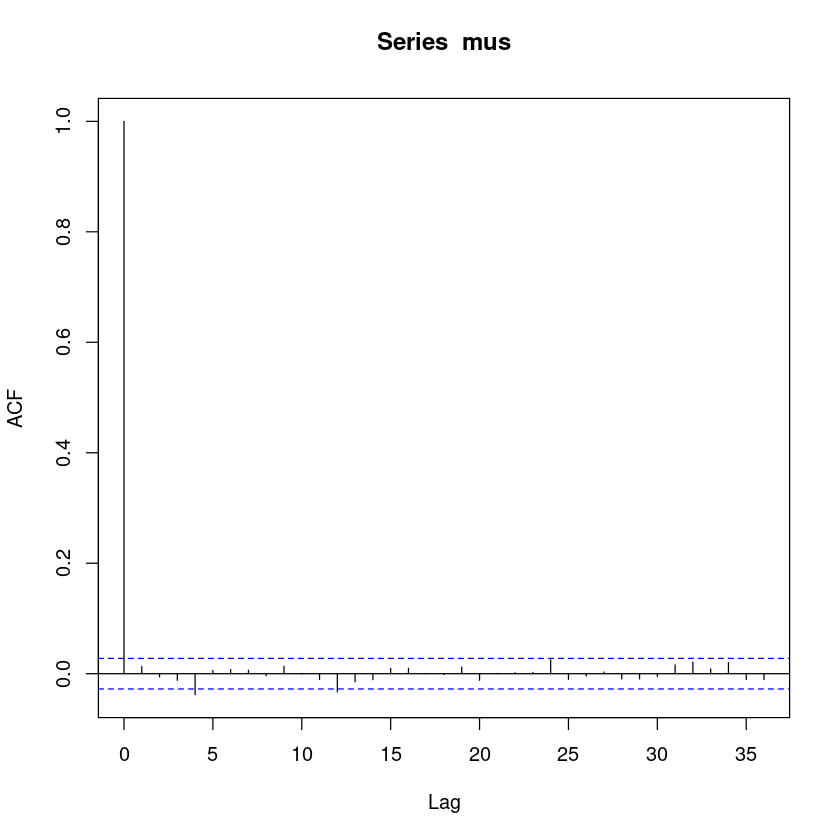

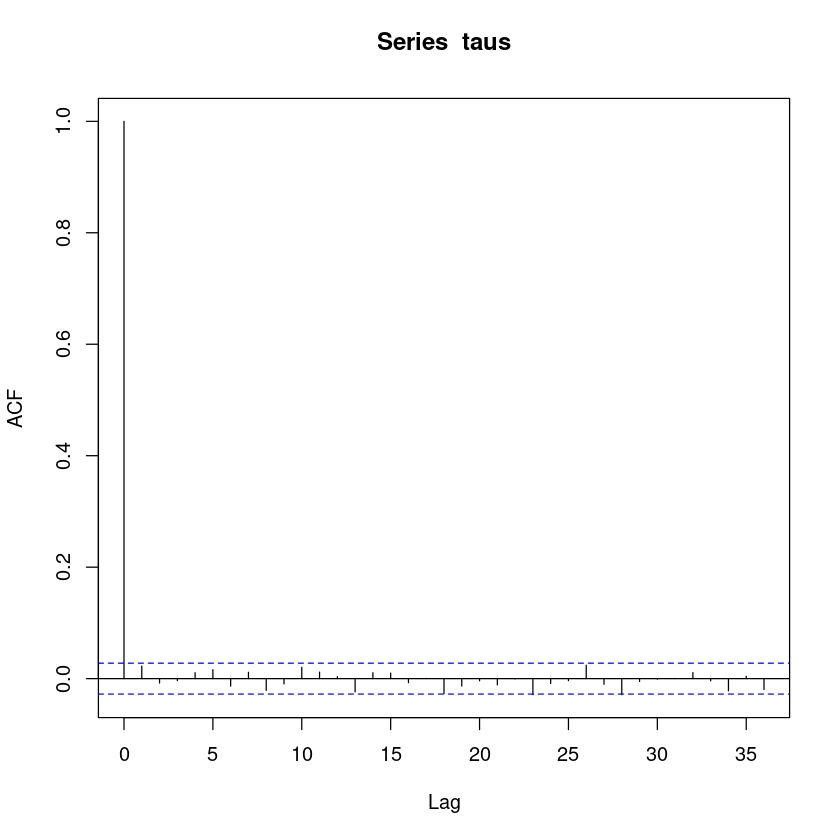

In [25]:
# YOUR CODE HERE
params = vector(mode = 'list')

n = length(h)
hd = mean(h)
ss = mean(h**2) - hd**2


params$m = hd
params$nu = n
params$alpha = n/2
params$b = (n/2)*ss


gibbsSample = gibbsNormGamma(95, 0.008, 5000, params)

mus = gibbsSample[1,]
taus= gibbsSample[2,]

dfsample = as.data.frame(t(gibbsSample))
names(dfsample) = c('mu', 'tau')

plot(dfsample, ylim = c(0, max(dfsample$tau)), type = 'l', main = "Trace of the samples")

#Here I plot the autocorrelations plots without subtracting burn-in samples

plot(acf(mus))
plot(acf(taus))




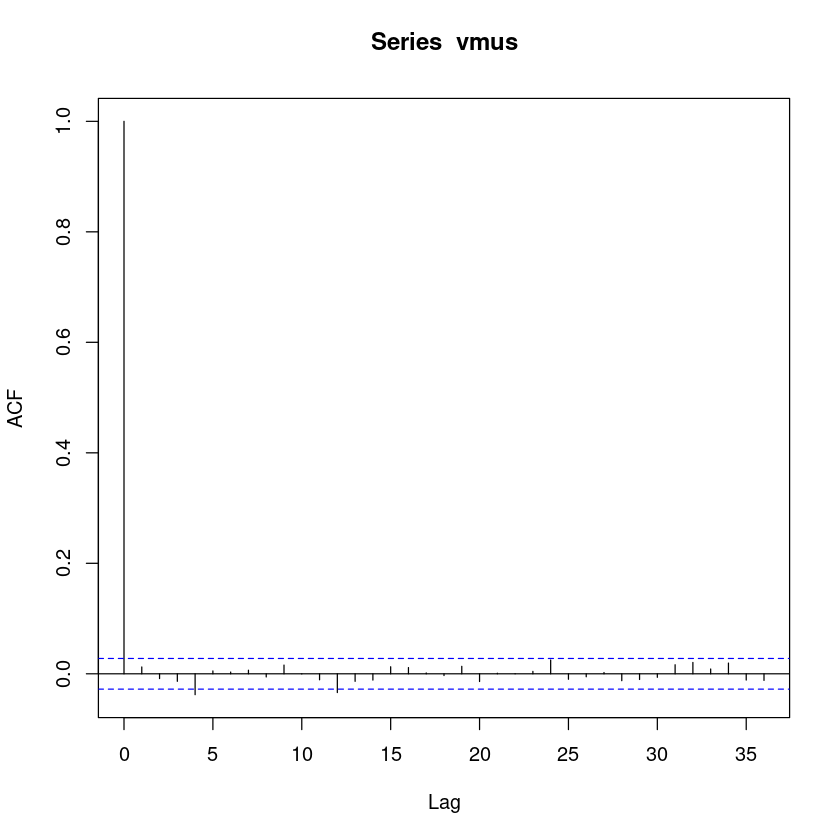

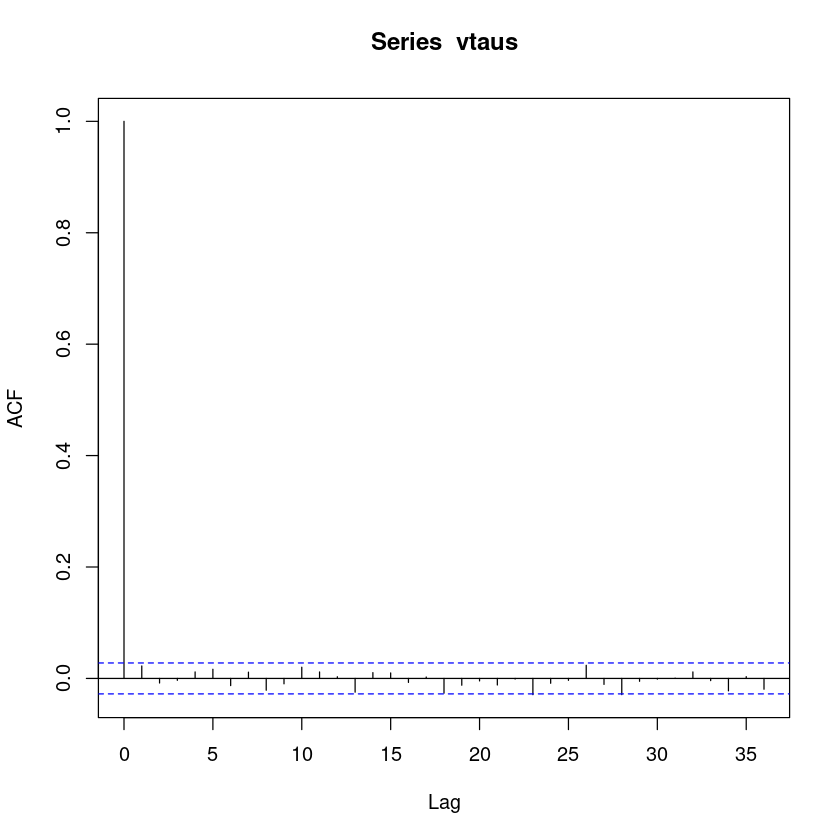

In [26]:
bi = 10
# Subtract burn-in

vmus = mus[(bi + 1):length(mus)]
vtaus = taus[(bi + 1):length(taus)]
vdfsample = dfsample[(bi + 1):nrow(dfsample),]
#Plot after subtracting burn-in samples 
rhomu = acf(vmus)$acf
rhotau = acf(vtaus)$acf

# Question 15

Compute estimates of the expectations and standard deviations of $\mu$ and $\tau$ using the samples. [5]

## Answer 

In [27]:
# YOUR CODE HERE
print(paste("Estimated expected value of mu is:", mean(vmus)))
print(paste("Estimated expected value of tau is:", mean(vtaus)))

print(paste("Estimated standard deviation of mu is:", sd(vmus)))
print(paste("Estimated standard deviation of tau is:", sd(vtaus)))


[1] "Estimated expected value of mu is: 100.531039972301"
[1] "Estimated expected value of tau is: 0.00921292231799208"
[1] "Estimated standard deviation of mu is: 0.753884560426686"
[1] "Estimated standard deviation of tau is: 0.000911698794815965"


# Question 16

Compute the Monte-Carlo standard errors of the mean estimates. [5]

## Answer 

In [28]:
# YOUR CODE HERE
ESSmu = effectiveSize(vmus)
ESStau = effectiveSize(vtaus)

#print(paste("Effective sample size for mu is:", ESSmu))    
#print(paste("Effective sample size for tau is:", ESStau))    

print(paste("MCMC standard error of mu is:", sd(vmus)/ESSmu))
print(paste("MCMC standard error of tau is:", sd(vtaus)/ESStau))


[1] "MCMC standard error of mu is: 0.000137531128700567"
[1] "MCMC standard error of tau is: 1.91096260590141e-07"


# Question 17

Comment on the need for burn-in iterations and on the degree of autocorrelation, and relate these to the effective sample sizes. Make sure to justify your statements. [3]

## Answer 

YOUR ANSWER HERE
* As known, markov chain needs time to reach a stationery distribution from which we can get our samples. 
* The purpose of knowing the size of burn-in iterations is to get rid of these samples afterwards . 
* The degree of autocorrelation tells us about how long will markov chain take to converger and if the samples will be biased or not, the lower the degree of the autocorrelation means the lower of dependeny between the adjecnt samples and that will get us a better performance. 
* If we have lower values of burn-in iterations and the degree of the autocorrelation we will get larger effective sample sizes because markove chain will converge to a stationery distribution in a fast and correct way. 

# Question 18

Write R code to make scatter and density plots of the samples from the previous question, and make the plots. [5]

## Answer 

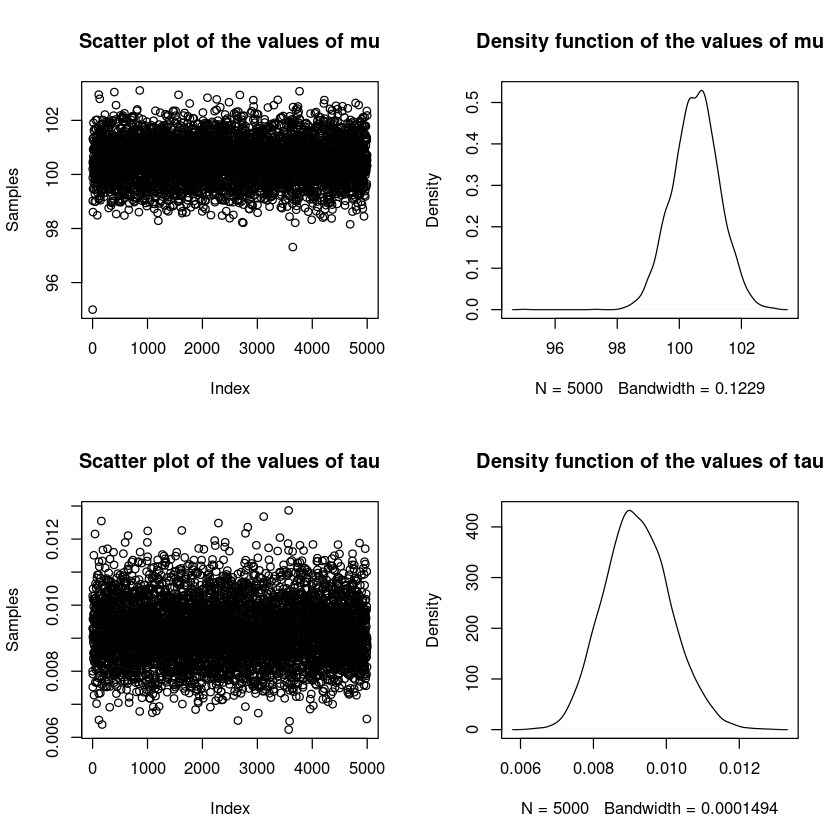

In [29]:
# YOUR CODE HERE
#x = mcmc(data = vdfsample)
mus = gibbsSample[1,]
taus= gibbsSample[2,]


par(mfrow=c(2,2))
plot(mus, main = "Scatter plot of the values of mu", ylab = "Samples")
plot(density(mus),main = "Density function of the values of mu")
plot(taus,main = "Scatter plot of the values of tau", ylab = "Samples")
plot(density(taus),main = "Density function of the values of tau")


# Question 19

Compare the results of the Gibbs sampling with the MLEs calculated earlier. Make sure to explain your comments. [3]

## Answer 


The values of MLEs and the results of Gibbs sampling are almost the same:

* The value of mu resulted from Gibbs sampling is less than one in MLEs by 0.268%.
* The value of tau resulted from Gibbs sampling is greater than one in MLEs by 0.006297%.

This indicates that the posterior probability distribution is dominated by Likliehood one.

# Question 20

Describe a simpler alternative to Gibbs sampling. [4]

## Answer 

I will talk about Rejection sampling: 
* It works by calcualting the probability of the sample if it is above than a specific value it will be accepted, otherwise it will be rejected. 

Advantages:
* It is usually good for low-diminsional distribuations.
* It can be used to generate large number of samples in the same time.
* It does not require any knwoldge of the form of the target distribuation and the conditional distribuation. 
* It is easy to implement. 

Disadvantages: 
* If the target distribuation in not unifrom and complex it will reject many samples before start accepting whic means longer time. 
* Also it takes long time if the actual probability density function of the target distribuation is close to zero.  

# Question 21

Is this method better or worse and why? [2]

## Answer

It is true that, we deal with a low-diminsional distribuation but gibbs sampling is better for these reasons:
* It is easy to find the conditional distributions because they are unnormalised, so we can overcome this additional step in gibbs sampling, easily. 
* It is simple to use these methods and discover the relevant values, such as the effective number of samples, thanks to the functions that are readily available in code library.
* We have a good infrence about likliehood distribuation and its MLEs, so we can decide what are the most probable initial values so we will avoid large numbers of biased and burn out samples and the distribuation will converge in a fast way.  
* In nutshell, it is preferable to employ a method that can handle complex distribution (Gibbs sampling) than one that cannot as long as we can deal with the limits of it.